# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Reading and cleaning the data

In [2]:
data = pd.read_csv("Admission_Predict_Ver1.1.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [4]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
data = data.drop("Serial No.", axis = 1)
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

# Storing the input/feature matrix in X and target, i.e. chance of admit in Y

In [6]:

# independent variables
X = data.drop("Chance of Admit ", axis=1)
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [7]:
# response variable

y = data["Chance of Admit "]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

# Splitting data into training and testing sets

In [8]:
!pip install scikit-learn

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
#random_test used to get the same set for all runs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Feature Scaling

In [11]:
# scaling done so that the attributes having greater value don't dominate the model

from sklearn.preprocessing import StandardScaler


In [12]:
sc = StandardScaler()


In [13]:
#fit done only once as data is already fitted

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Training the model

In [15]:
# Fit method uses the training data as an input to train the machine learning model

lr = LinearRegression()
lr.fit(X_train, y_train)

svm = SVR()
svm.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)


GradientBoostingRegressor()

# Prediction on the test data

In [16]:
y_pred_lr = lr.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gr = gr.predict(X_test)
y_pred_lr

array([0.91457473, 0.79518127, 0.57265986, 0.70736968, 0.81588282,
       0.86206561, 0.47459746, 0.64850923, 0.82378728, 0.80741498,
       0.72193204, 0.72589118, 0.65632227, 0.93677168, 0.8241518 ,
       0.50979177, 0.83931942, 0.59727295, 0.53339576, 0.57155958,
       0.66548168, 0.55305833, 0.72232308, 0.79506004, 0.78027648,
       0.60248654, 0.94840363, 0.84741471, 0.62777011, 0.74343096,
       0.55533035, 0.73004034, 0.54474225, 0.86116288, 0.65713016,
       0.7371816 , 0.55423839, 0.95718977, 0.64364267, 0.71057279,
       0.97036982, 0.57495143, 0.67075391, 0.85830422, 0.94112903,
       0.57793762, 0.9583926 , 0.83902765, 0.79591651, 0.92570648,
       0.88805969, 0.56366238, 0.70359711, 0.52658929, 0.9536427 ,
       0.59746814, 0.95600396, 0.73916386, 0.66256982, 0.5012903 ,
       0.62950759, 0.68031188, 0.59896721, 0.59203806, 0.44085868,
       0.58866369, 0.8667547 , 0.89783006, 0.65831807, 0.70667392,
       0.6176818 , 0.78587721, 0.69152566, 0.56271019, 0.55429

# Algorithm Evaluation

In [17]:
from sklearn import metrics

In [18]:
score_lr = metrics.r2_score(y_test, y_pred_lr)
score_svm = metrics.r2_score(y_test, y_pred_svm)
score_rf = metrics.r2_score(y_test, y_pred_rf)
score_gr = metrics.r2_score(y_test, y_pred_gr)

print(score_lr, score_svm, score_rf, score_gr)

0.8188432567829628 0.7589384637350619 0.788261990220049 0.7834079470277666


In [19]:
final_data = pd.DataFrame({"Models": ["LR", "SVM", "RF", "GR"], 
                          "R2_Scores": [score_lr, score_svm, score_rf, score_gr]})

In [20]:
final_data

,Models,R2_Scores
0,LR,0.818843
1,SVM,0.758938
2,RF,0.788262
3,GR,0.783408


<AxesSubplot: xlabel='Models', ylabel='R2_Scores'>

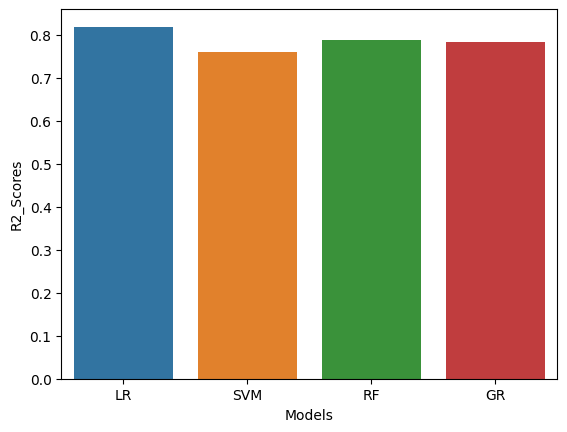

In [21]:
sns.barplot(data=final_data, x=final_data["Models"], y=final_data["R2_Scores"])

# Classification

In [22]:
# Converting dependent variable to categorical

y_train = [1 if value > 0.8 else 0 for value in y_train]
y_test = [1 if value > 0.8 else 0 for value in y_test]

y_train = np.array(y_train)
y_test = np.array(y_test)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# to evaluate performace of various classification models
from sklearn.metrics import accuracy_score

In [24]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_logr = lr.predict(X_test)
print(accuracy_score(y_test, y_pred_logr), y_pred_logr)

0.97 [1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]


In [25]:
svm = SVC()
svm.fit(X_train, y_train)

y_pred_svmc = svm.predict(X_test)
print(accuracy_score(y_test, y_pred_svmc))

0.96


In [26]:
knc = KNeighborsClassifier() 
knc.fit(X_train, y_train)

#predicted values on test data
y_pred_knc = knc.predict(X_test)
print(accuracy_score(y_test, y_pred_knc))

0.97


In [27]:
gr = GradientBoostingClassifier()
gr.fit(X_train, y_train)

y_pred_grc = gr.predict(X_test)
print(accuracy_score(y_test, y_pred_grc))

0.96


In [28]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rfc = rf.predict(X_test)
print(accuracy_score(y_test, y_pred_rfc))

0.95


In [29]:
final_c_data = pd.DataFrame({"Models": ["LR", "SVC", "GBC", "RFC"], 
                          "Accuracy_Scores": [accuracy_score(y_test, y_pred_logr), 
                                              accuracy_score(y_test, y_pred_svmc),  
                                              accuracy_score(y_test, y_pred_grc), 
                                              accuracy_score(y_test, y_pred_rfc)]})


<AxesSubplot: xlabel='Models', ylabel='Accuracy_Scores'>

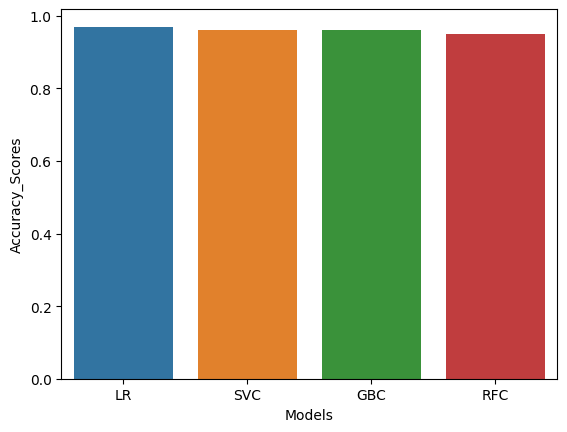

In [30]:
sns.barplot(data=final_c_data, x=final_c_data["Models"], y=final_c_data["Accuracy_Scores"])